In [3]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
import cupy as cp
import pack_cuda
pack_cuda._ensure_initialized()
import pack_cuda_lut
pack_cuda_lut._ensure_initialized()

init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 8.434 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Fu

local


<Axes: >

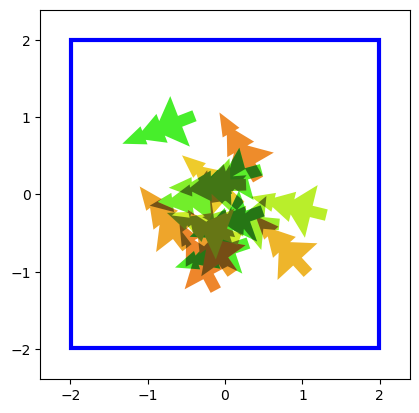

In [4]:
importlib.reload(kgs)
sol = kgs.SolutionCollectionSquare()
sol.xyt = 2*cp.random.default_rng(0).uniform(size=(1,15,3), dtype = kgs.dtype_cp)
sol.h = cp.array([[11000,0.,0.3]], dtype = kgs.dtype_cp)
sol.snap()
sol.check_constraints()
sol.h*=1.5
pack_vis_sol.pack_vis_sol(sol)

SolutionCollectionSquare(comment='', xyt=array([[[-0.7551824 ,  0.979359  ,  1.9801602 ],
        [-0.7721799 , -0.10740153,  1.6017256 ],
        [ 0.5519217 ,  1.1565399 ,  0.54957694],
        [-0.27882212,  0.44200462,  0.7795512 ],
        [ 0.1496836 ,  0.7298669 ,  1.5406976 ],
        [-0.65921307, -1.5403168 ,  0.34550676],
        [ 0.3525662 , -1.0130785 ,  1.6577513 ],
        [ 0.36592704, -0.03294334,  1.6535254 ],
        [-1.0749518 , -0.604907  ,  0.5791241 ],
        [-0.34548   ,  0.28040367,  1.5824252 ],
        [-0.32502714, -1.1642787 ,  0.5743898 ],
        [ 1.0299315 , -0.9121467 ,  0.73357236],
        [ 0.36995572, -0.5658697 ,  2.1164534 ],
        [-0.3921456 , -0.53964067,  1.3497533 ],
        [ 1.1573887 ,  0.03020407,  1.236735  ]]], dtype=float32), h=array([[3.9808574, 0.       , 0.       ]], dtype=float32), use_fixed_h=False, periodic=False)

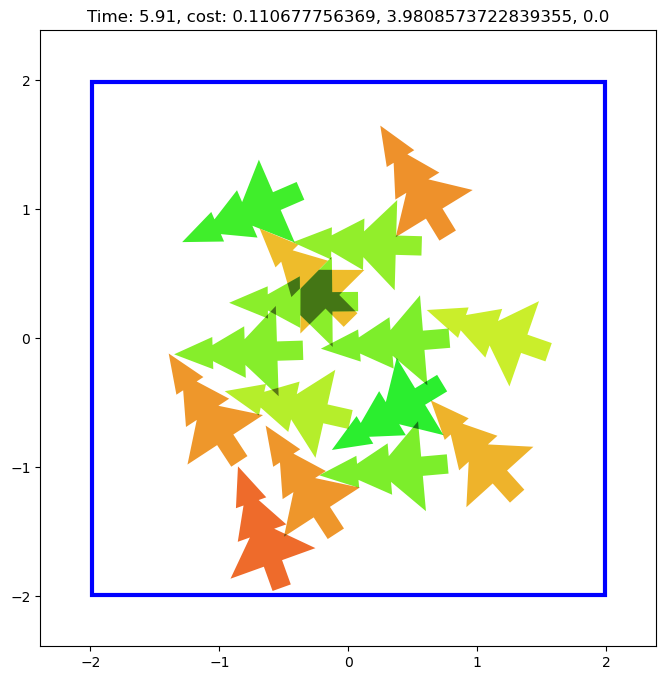

In [8]:
import pack_dynamics
optimizer = pack_dynamics.Optimizer()
optimizer.cost = optimizer.cost.costs[2]
optimizer.dt/=10
#optimizer.n_iterations *= 10
optimizer.plot_interval = 1e-1
optimizer.run_simulation(sol)

SolutionCollectionSquare(comment='', xyt=array([[[-0.899137  ,  1.0258771 ,  1.9703851 ],
        [-0.6998193 , -0.15343687,  1.6919631 ],
        [ 0.42084602,  1.3967316 ,  0.42795184],
        [-0.20693853,  0.08854558,  0.8552706 ],
        [-0.01580398,  0.9643059 ,  1.7120426 ],
        [-0.7033836 , -1.4814479 ,  0.40478137],
        [ 0.37732106, -1.2758719 ,  1.9022948 ],
        [ 0.5675415 , -0.5211419 ,  1.3311249 ],
        [-1.178693  , -0.49790773,  0.61340296],
        [-0.18552059,  0.49739215,  1.5839578 ],
        [-0.3771722 , -1.081876  ,  0.57814443],
        [ 1.1482086 , -1.0648438 ,  0.7469185 ],
        [ 0.33244365, -0.15751375,  2.041556  ],
        [-0.27718857, -0.6425549 ,  1.2020764 ],
        [ 1.0716727 ,  0.04153344,  1.2274792 ]]], dtype=float32), h=array([[3.9808574, 0.       , 0.       ]], dtype=float32), use_fixed_h=False, periodic=False)

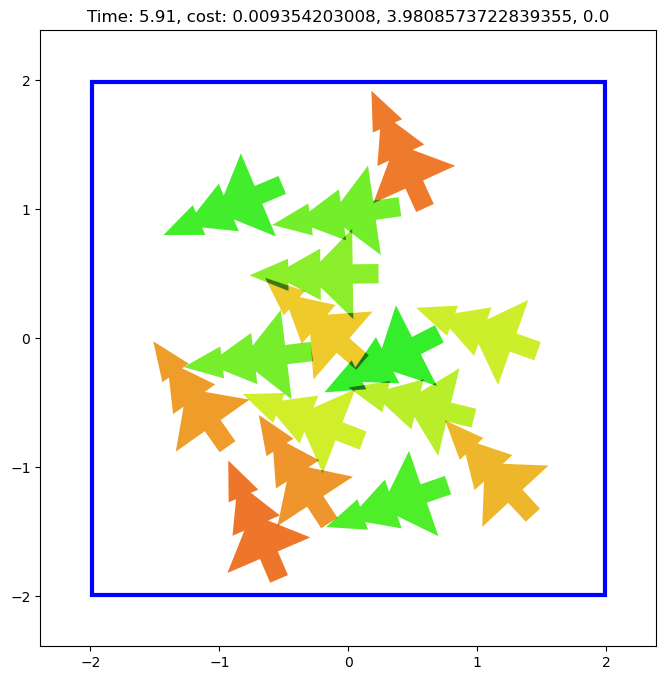

In [9]:
import pack_dynamics
import pack_cost
optimizer = pack_dynamics.Optimizer()
optimizer.cost.costs[2] = pack_cost.CollisionCostExactSeparation(scaling=1., use_lookup_table=True,lut_N_x=200,lut_N_y=200,lut_N_theta=200)
optimizer.cost = optimizer.cost.costs[2]
optimizer.dt/=10
#optimizer.n_iterations *= 10
optimizer.plot_interval = 1e-1
optimizer.run_simulation(sol)

In [7]:
optimizer.cost.compute_cost_allocate(sol)

(array([2.1620514], dtype=float32),
 array([[[ 0.        ,  0.        ,  0.        ],
         [ 0.3866331 ,  0.59312445,  0.1306921 ],
         [-0.5483292 , -0.38387665, -0.1263968 ],
         [ 0.29734305,  1.3334441 , -0.32892972],
         [ 0.4314014 , -1.6196984 ,  0.43165225],
         [ 0.64729166,  1.4341117 , -0.13263263],
         [-1.258677  ,  0.93020475,  0.32971567],
         [-0.01991312,  0.4787718 , -0.0046603 ],
         [ 0.8925366 ,  0.33884728,  0.07229248],
         [-0.39213762, -0.8147428 ,  0.31521797],
         [ 1.0008006 , -0.51017976, -0.05662701],
         [-0.22792841,  0.413368  , -0.06080276],
         [-0.54627955, -2.0918221 ,  0.0730385 ],
         [-0.4747624 ,  0.11138987,  0.13398227],
         [-0.18797925, -0.21294226,  0.10680054]]], dtype=float32),
 array([[0., 0., 0.]], dtype=float32))